In [1]:
import ambulance_game as abg
import random
import numpy as np
import nashpy as nash
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.optimize
import itertools

In [2]:
from game_theoretic_model import (
    get_accepting_proportion_of_class_2_individuals,
    make_plot_of_distribution_among_two_systems,
    get_weighted_mean_blocking_difference_between_two_markov_systems,
    calculate_class_2_individuals_best_response_markov,
    get_routing_matrix,
    get_payoff_matrices,
    build_game_using_payoff_matrices,
    make_fictitious_play_plot,
    make_ficititious_play_plot_over_different_values_of_alpha,
    make_calculated_roots_over_alpha_plot,
    make_violinplots_of_fictitious_play,
)

# The whole problem

### The routing matrix

$$
    p_{i,j} = \{ \quad p \quad | \quad \alpha P(L_1) + (1 - \alpha)B_1 = \alpha P(L_2) + (1 - \alpha)B_2 \}
$$

$$
D = 
\begin{bmatrix}
    p_{1,1} & p_{1,2} & p_{1,3} & p_{1,4} \\
    p_{2,1} & p_{2,2} & p_{2,3} & p_{2,4} \\
    p_{3,1} & p_{3,2} & p_{3,3} & p_{3,4} \\
    p_{4,1} & p_{4,2} & p_{4,3} & p_{4,4} 
\end{bmatrix}
$$

### The payoff matrices
$$
A = 
\begin{bmatrix}
    U_1(p_{1,1}) & U_1(p_{1,2}) & U_1(p_{1,3}) & U_1(p_{1,4}) \\
    U_1(p_{2,1}) & U_1(p_{2,2}) & U_1(p_{2,3}) & U_1(p_{2,4}) \\
    U_1(p_{3,1}) & U_1(p_{3,2}) & U_1(p_{3,3}) & U_1(p_{3,4}) \\
    U_1(p_{4,1}) & U_1(p_{4,2}) & U_1(p_{4,3}) & U_1(p_{4,4}) 
\end{bmatrix} \\
$$

$$
B = 
\begin{bmatrix}
    U_2(1 - p_{1,1}) & U_2(1 - p_{1,2}) & U_2(1 - p_{1,3}) & U_2(1 - p_{1,4}) \\
    U_2(1 - p_{2,1}) & U_2(1 - p_{2,2}) & U_2(1 - p_{2,3}) & U_2(1 - p_{2,4}) \\
    U_2(1 - p_{3,1}) & U_2(1 - p_{3,2}) & U_2(1 - p_{3,3}) & U_2(1 - p_{3,4}) \\
    U_2(1 - p_{4,1}) & U_2(1 - p_{4,2}) & U_2(1 - p_{4,3}) & U_2(1 - p_{4,4}) 
\end{bmatrix} \\
$$

$$
\textbf{where}
$$

$$
    U_1(p_{i,j}) = P(W_1(p_{i,j}) < t) \\
    U_2(p_{i,j}) = P(W_2(p_{i,j}) < t)
$$

$$
\textbf{OR}
$$

$$
    U_1(p_{i,j}) = -(P(W_1(p_{i,j}) < t) - 0.95)^2 \\
    U_2(p_{i,j}) = -(P(W_2(p_{i,j}) < t) - 0.95)^2
$$

# Distribution of class 2 individuals (choice of $\alpha$)

In [3]:
lambda_2 = 4

lambda_1_1 = 3
mu_1 = 4
num_of_servers_1 = 2
system_capacity_1 = 8
buffer_capacity_1 = 8

lambda_1_2 = 3
mu_2 = 3
num_of_servers_2 = 3
system_capacity_2 = 8
buffer_capacity_2 = 8

class_type = None
target = 4

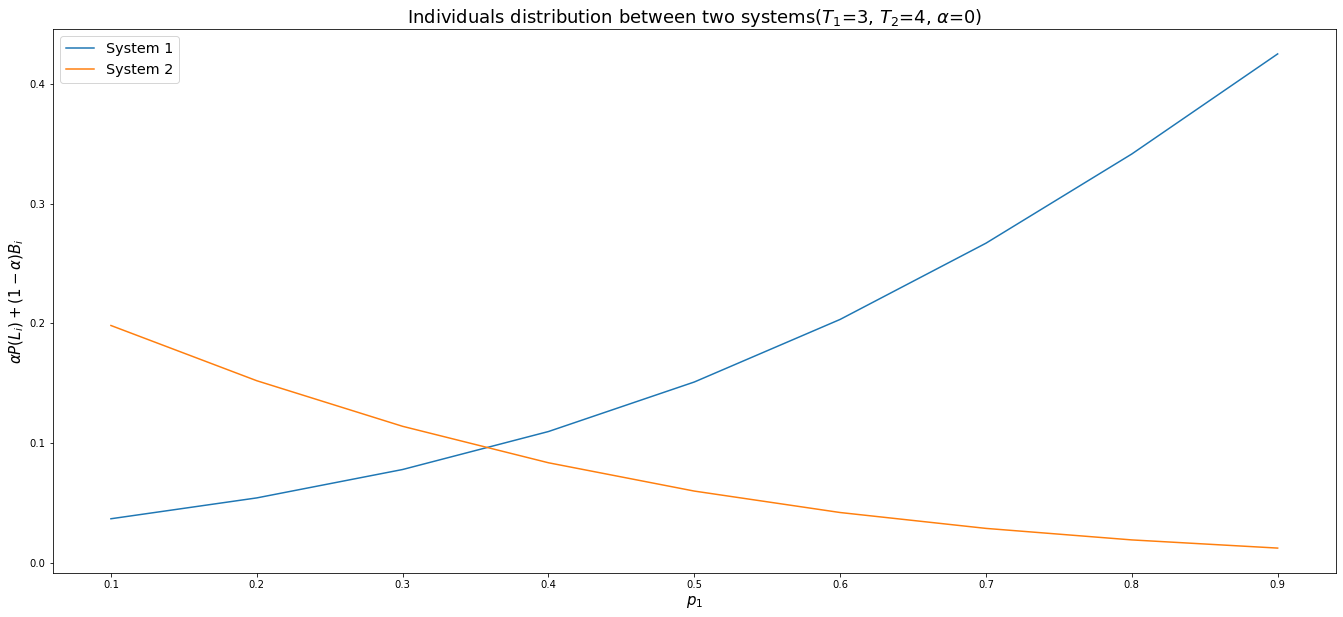

In [17]:
make_plot_of_distribution_among_two_systems(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    threshold_1=3,
    threshold_2=4,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    alpha=0,
)

$$ \alpha = 0 \qquad \Rightarrow \qquad B_1 = B_2 $$

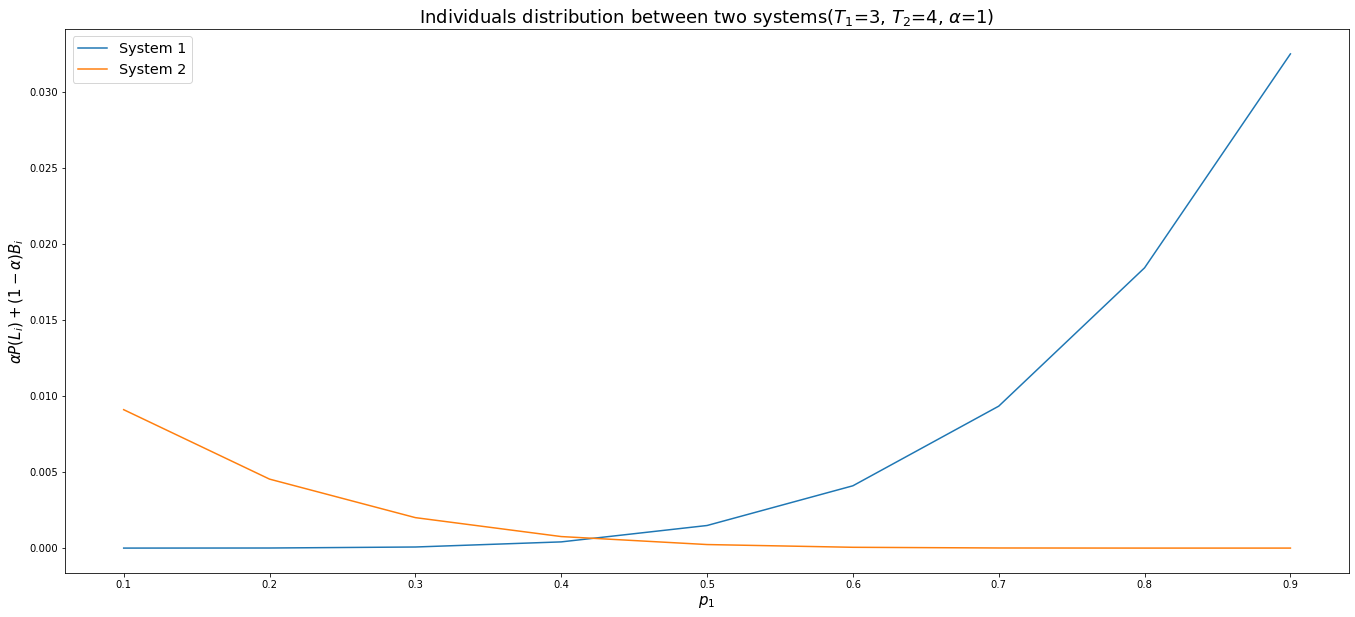

In [18]:
make_plot_of_distribution_among_two_systems(
    lambda_2=lambda_2, 
    lambda_1_1=lambda_1_1, 
    lambda_1_2=lambda_1_2,
    mu_1=mu_1, 
    mu_2=mu_2, 
    num_of_servers_1=num_of_servers_1, 
    num_of_servers_2=num_of_servers_2, 
    threshold_1=3, 
    threshold_2=4, 
    system_capacity_1=system_capacity_1, 
    system_capacity_2=system_capacity_2, 
    buffer_capacity_1=buffer_capacity_1, 
    buffer_capacity_2=buffer_capacity_2,
    alpha=1,
)

$$ \alpha = 1 \qquad \Rightarrow \qquad P(L_1) = P(L_2) $$

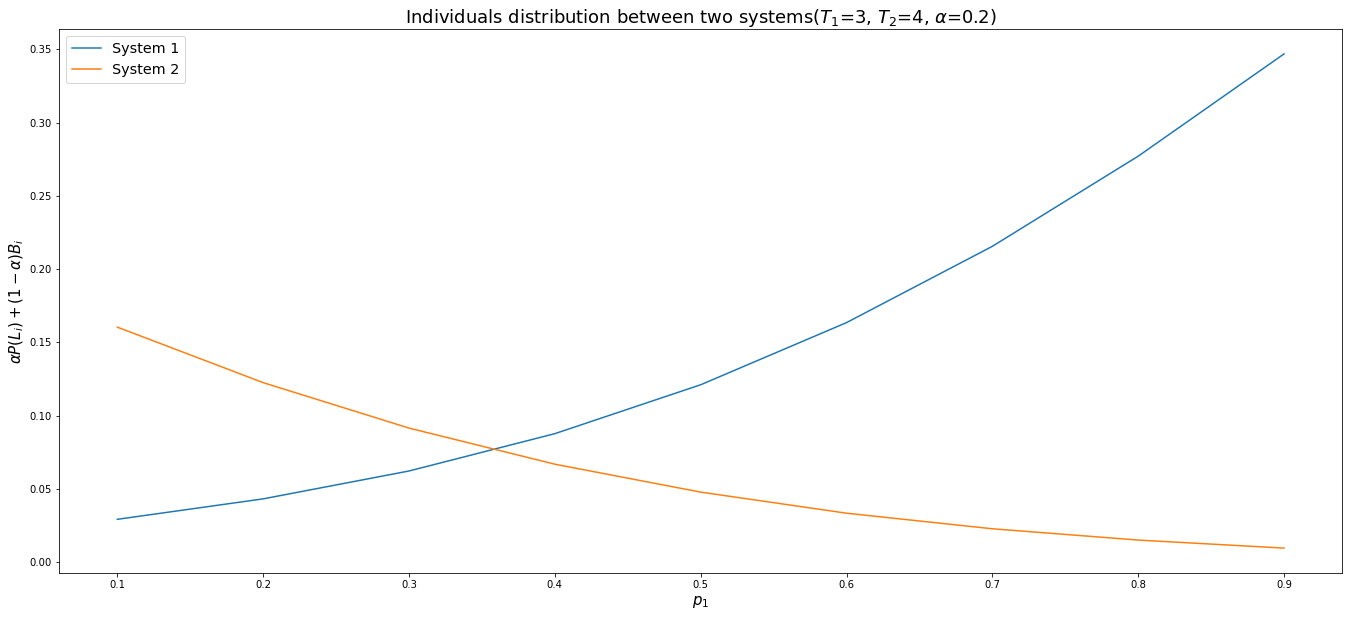

In [19]:
make_plot_of_distribution_among_two_systems(
    lambda_2=lambda_2, 
    lambda_1_1=lambda_1_1, 
    lambda_1_2=lambda_1_2, 
    mu_1=mu_1, 
    mu_2=mu_2, 
    num_of_servers_1=num_of_servers_1, 
    num_of_servers_2=num_of_servers_2, 
    threshold_1=3, 
    threshold_2=4, 
    system_capacity_1=system_capacity_1, 
    system_capacity_2=system_capacity_2, 
    buffer_capacity_1=buffer_capacity_1, 
    buffer_capacity_2=buffer_capacity_2,
    alpha=0.2,
)

$$ \alpha = 0.2 \qquad \Rightarrow \qquad \frac{P(L_1) + 4 B_1}{5} = \frac{P(L_2) + 4 B_2}{5} $$

### Example 1

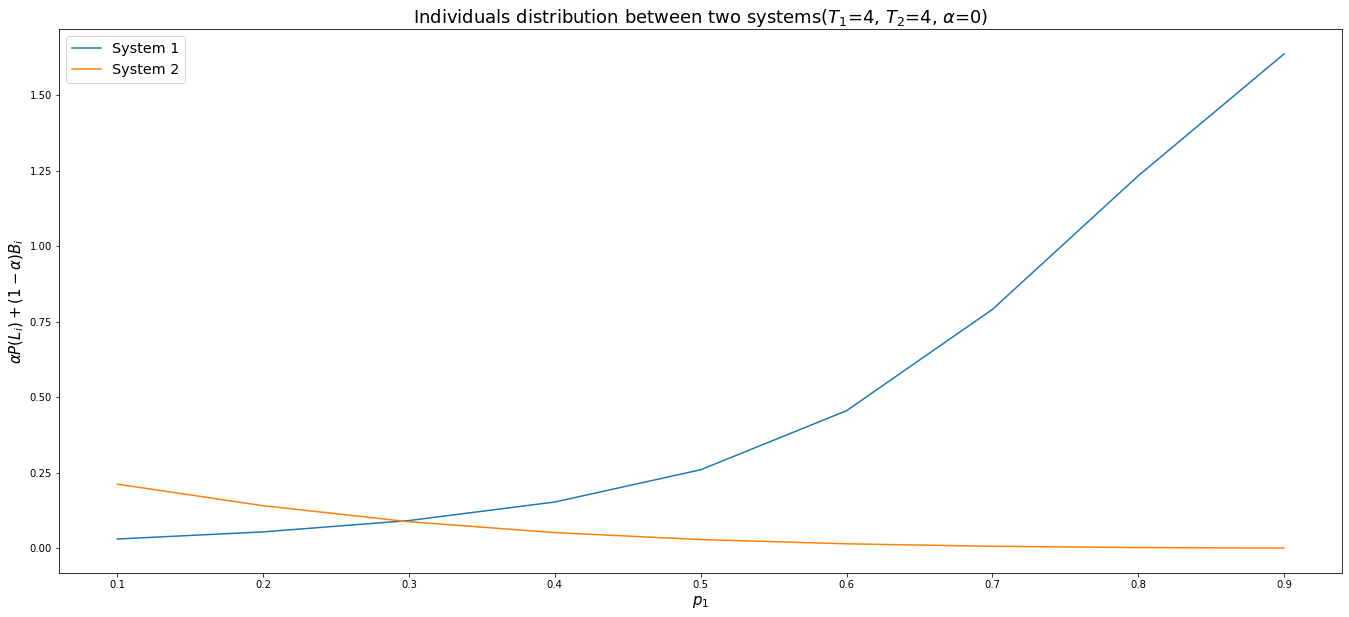

In [8]:
make_plot_of_distribution_among_two_systems(
    lambda_2=10, 
    lambda_1_1=5, 
    lambda_1_2=1, 
    mu_1=3, 
    mu_2=3, 
    num_of_servers_1=5, 
    num_of_servers_2=5, 
    threshold_1=4, 
    threshold_2=4, 
    system_capacity_1=20, 
    system_capacity_2=20, 
    buffer_capacity_1=20, 
    buffer_capacity_2=10,
    alpha=0,
)

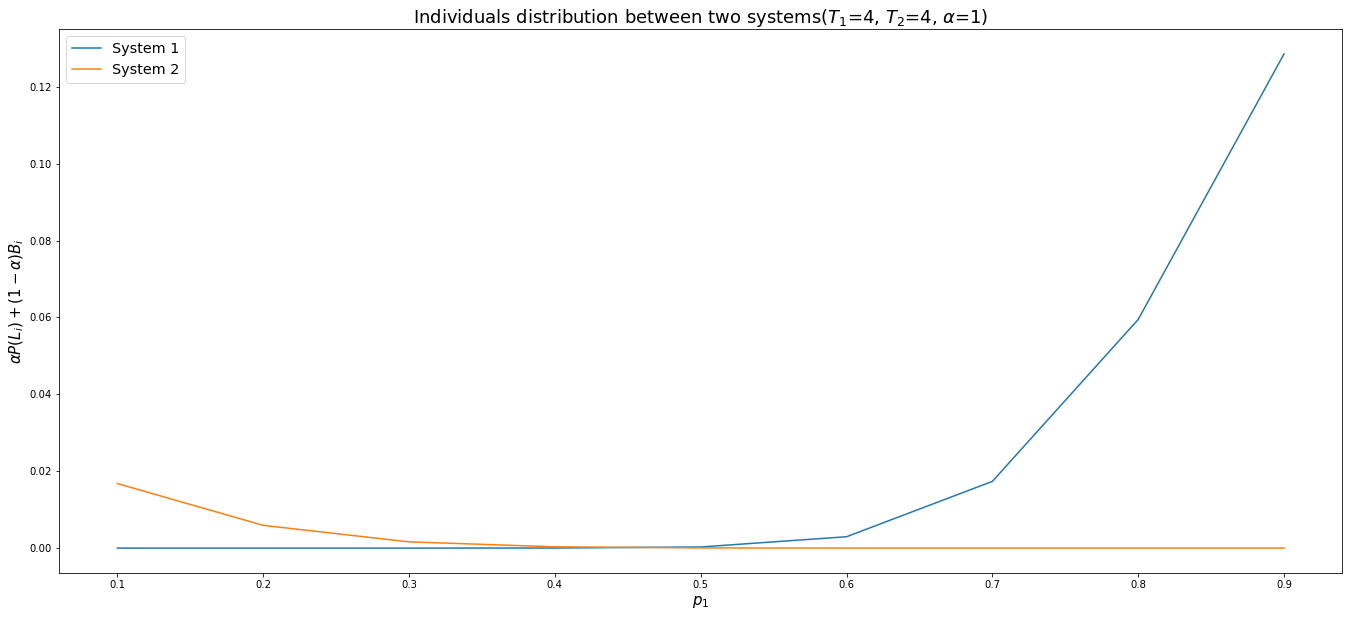

In [9]:
make_plot_of_distribution_among_two_systems(
    lambda_2=10, 
    lambda_1_1=5, 
    lambda_1_2=1, 
    mu_1=3, 
    mu_2=3, 
    num_of_servers_1=5, 
    num_of_servers_2=5, 
    threshold_1=4, 
    threshold_2=4, 
    system_capacity_1=20, 
    system_capacity_2=20, 
    buffer_capacity_1=20, 
    buffer_capacity_2=10,
    alpha=1,
)

### Example 2

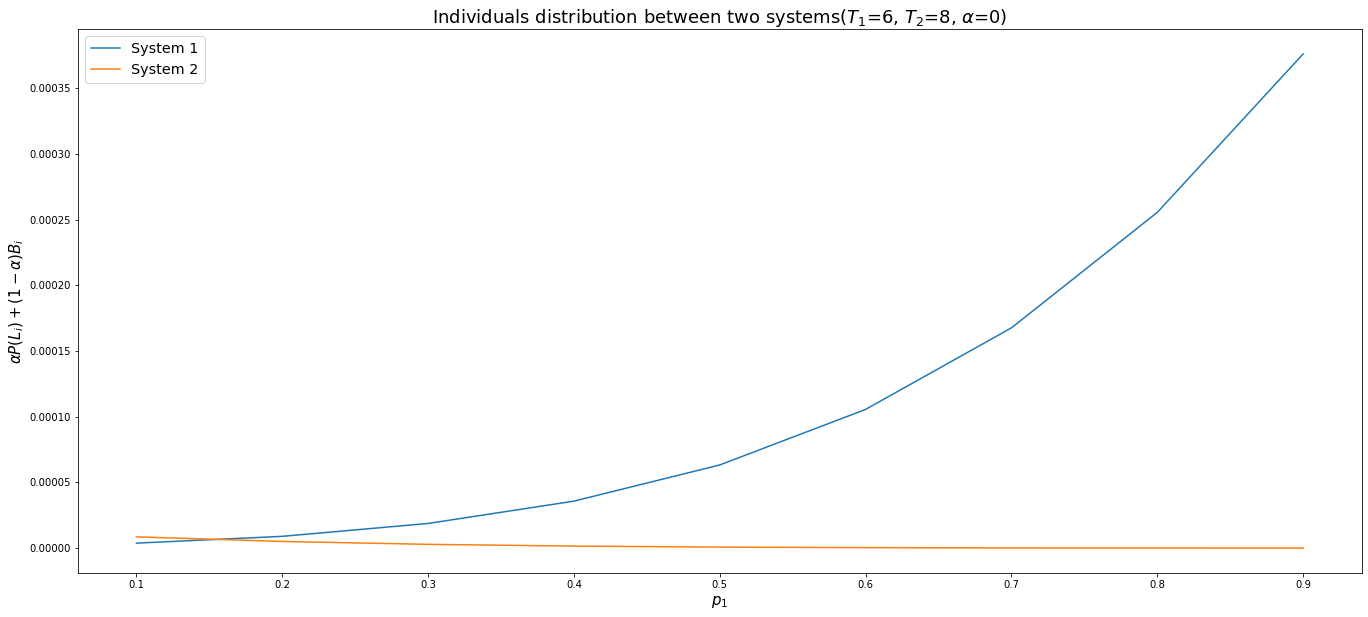

In [32]:
make_plot_of_distribution_among_two_systems(
    lambda_2=2, 
    lambda_1_1=1, 
    lambda_1_2=1, 
    mu_1=2, 
    mu_2=2, 
    num_of_servers_1=10, 
    num_of_servers_2=10, 
    threshold_1=6, 
    threshold_2=8, 
    system_capacity_1=10, 
    system_capacity_2=10, 
    buffer_capacity_1=5, 
    buffer_capacity_2=5,
    alpha=0,
)

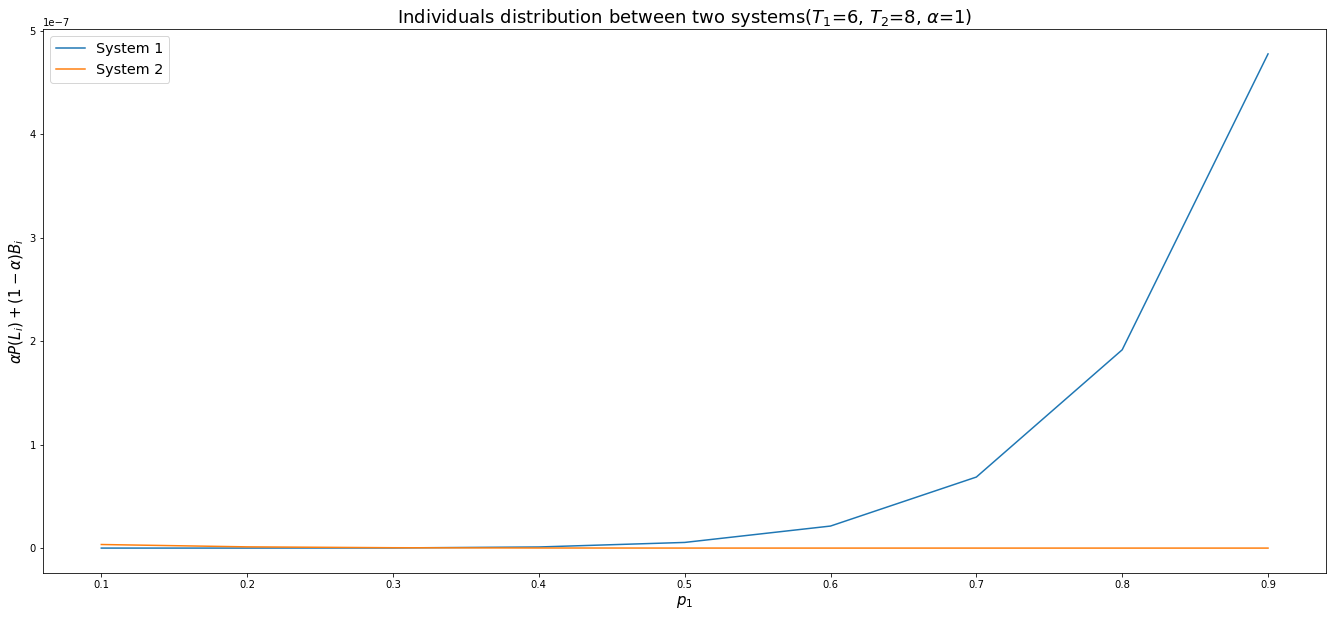

In [3]:
make_plot_of_distribution_among_two_systems(
    lambda_2=2, 
    lambda_1_1=1, 
    lambda_1_2=1, 
    mu_1=2, 
    mu_2=2, 
    num_of_servers_1=10, 
    num_of_servers_2=10, 
    threshold_1=6, 
    threshold_2=8, 
    system_capacity_1=10, 
    system_capacity_2=10, 
    buffer_capacity_1=5, 
    buffer_capacity_2=5,
    alpha=1,
)

### Example 3

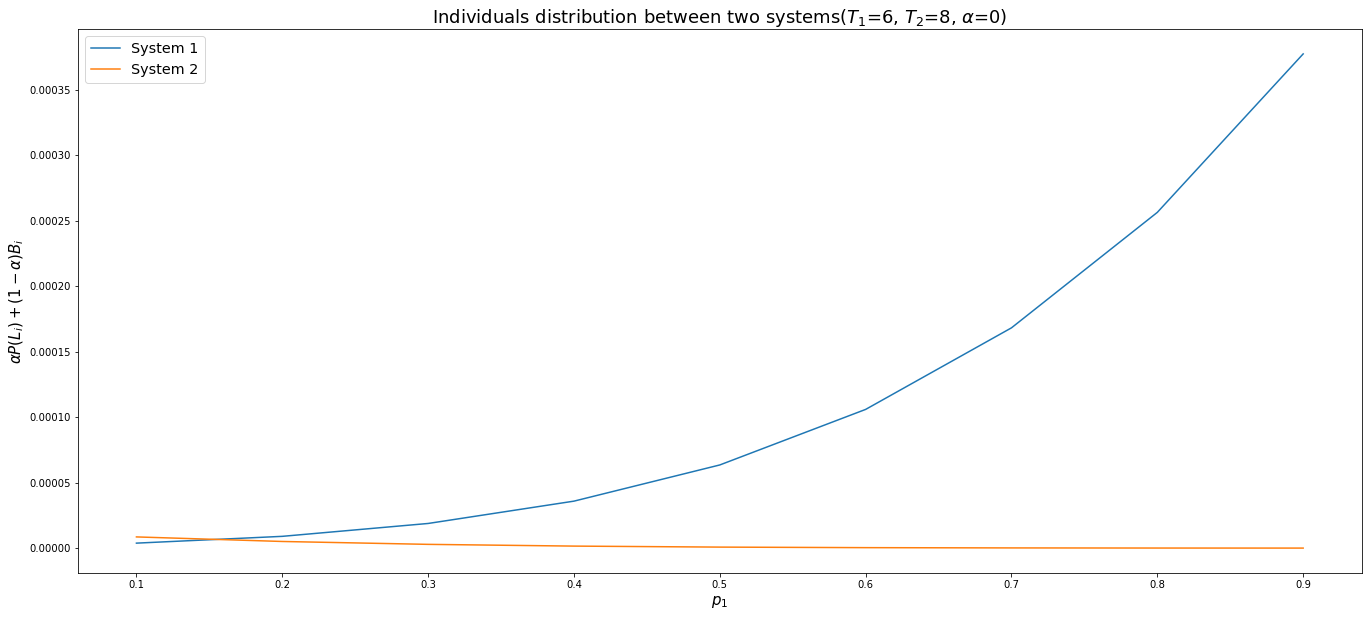

In [6]:
make_plot_of_distribution_among_two_systems(
    lambda_2=2, 
    lambda_1_1=1, 
    lambda_1_2=1, 
    mu_1=2, 
    mu_2=2, 
    num_of_servers_1=7, 
    num_of_servers_2=10, 
    threshold_1=6, 
    threshold_2=8, 
    system_capacity_1=10, 
    system_capacity_2=10, 
    buffer_capacity_1=5, 
    buffer_capacity_2=5,
    alpha=0,
)

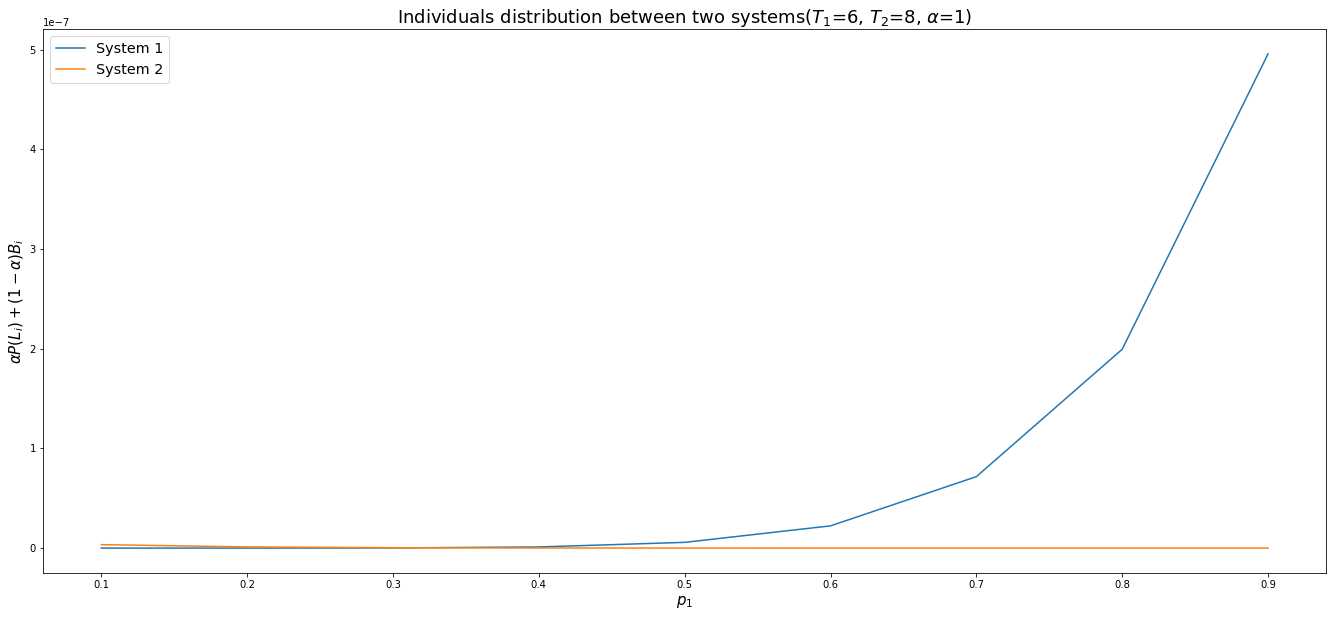

In [7]:
make_plot_of_distribution_among_two_systems(
    lambda_2=2, 
    lambda_1_1=1, 
    lambda_1_2=1, 
    mu_1=2, 
    mu_2=2, 
    num_of_servers_1=7, 
    num_of_servers_2=10, 
    threshold_1=6, 
    threshold_2=8, 
    system_capacity_1=10, 
    system_capacity_2=10, 
    buffer_capacity_1=5, 
    buffer_capacity_2=5,
    alpha=1,
)

# Calculated roots of class 2 individuals

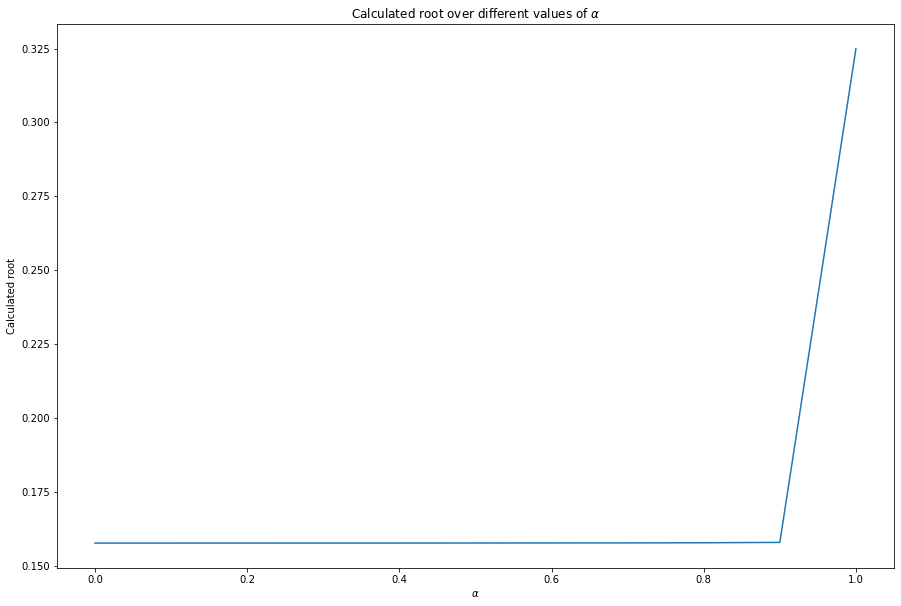

In [3]:
calc_roots = make_calculated_roots_over_alpha_plot(
    lambda_2=2, 
    lambda_1_1=1, 
    lambda_1_2=1, 
    mu_1=2, 
    mu_2=2, 
    num_of_servers_1=7, 
    num_of_servers_2=10, 
    threshold_1=6, 
    threshold_2=8, 
    system_capacity_1=10, 
    system_capacity_2=10, 
    buffer_capacity_1=5, 
    buffer_capacity_2=5,
)

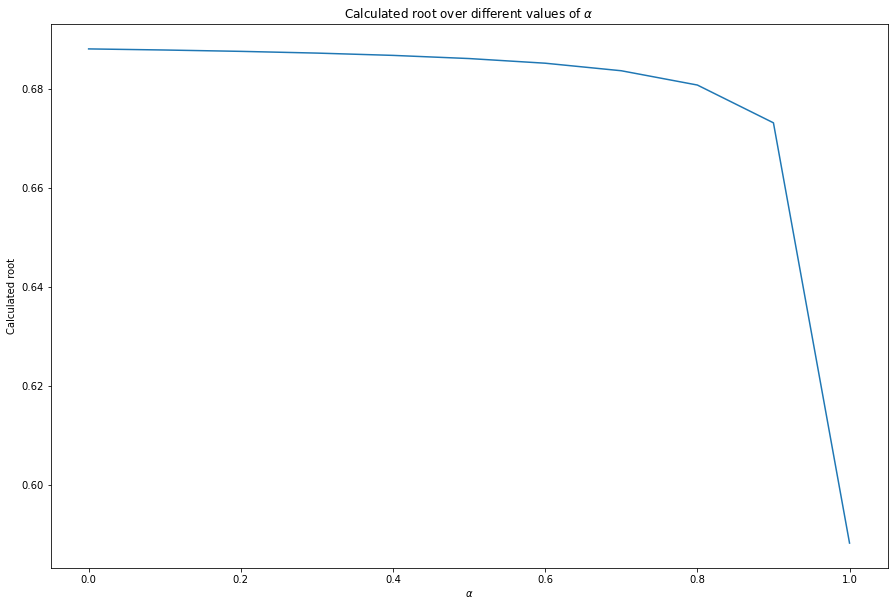

In [4]:
calc_roots = make_calculated_roots_over_alpha_plot(
    lambda_2=2,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=3,
    mu_2=2,
    num_of_servers_1=2,
    num_of_servers_2=3,
    threshold_1=5,
    threshold_2=4,
    system_capacity_1=6,
    system_capacity_2=6,
    buffer_capacity_1=4,
    buffer_capacity_2=4,
)

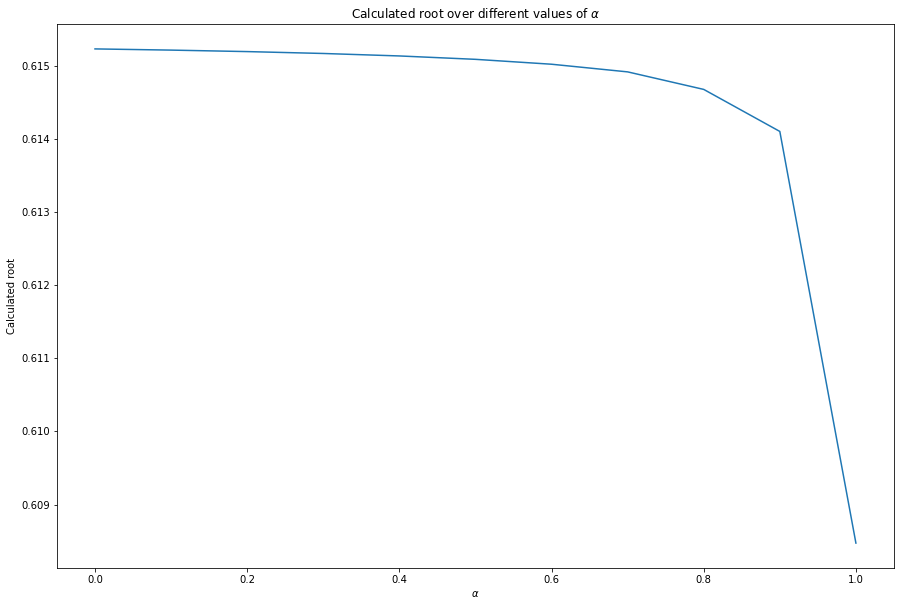

In [5]:
calc_roots = make_calculated_roots_over_alpha_plot(
    lambda_2=3,
    lambda_1_1=1.5,
    lambda_1_2=1.5,
    mu_1=3,
    mu_2=2,
    num_of_servers_1=2,
    num_of_servers_2=3,
    threshold_1=6,
    threshold_2=5,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=6,
    buffer_capacity_2=5,
)

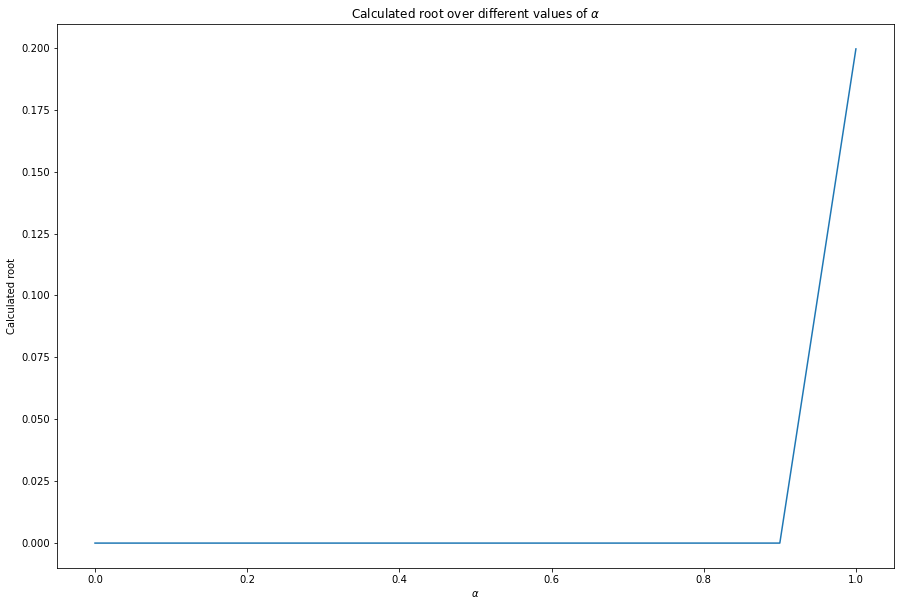

In [6]:
calc_roots = make_calculated_roots_over_alpha_plot(
    lambda_2=3,
    lambda_1_1=3,
    lambda_1_2=2,
    mu_1=4,
    mu_2=5,
    num_of_servers_1=2,
    num_of_servers_2=3,
    threshold_2=4,
    threshold_1=5,
    system_capacity_1=10,
    system_capacity_2=10,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
)

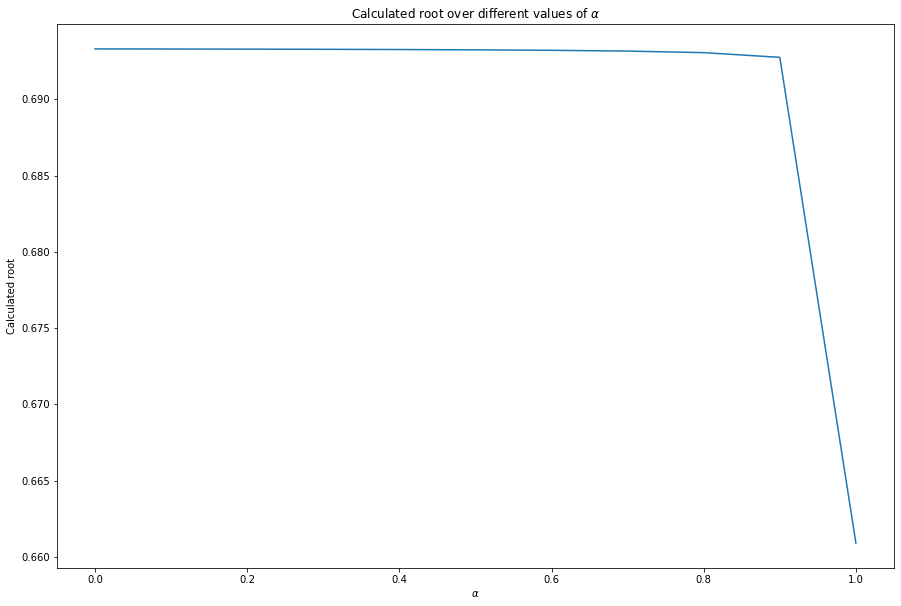

In [7]:
calc_roots = make_calculated_roots_over_alpha_plot(
    lambda_2=2,
    lambda_1_1=3,
    lambda_1_2=4,
    mu_1=3,
    mu_2=3,
    num_of_servers_1=3,
    num_of_servers_2=4,
    threshold_1=9,
    threshold_2=7,
    system_capacity_1=10,
    system_capacity_2=8,
    buffer_capacity_1=6,
    buffer_capacity_2=4,
)

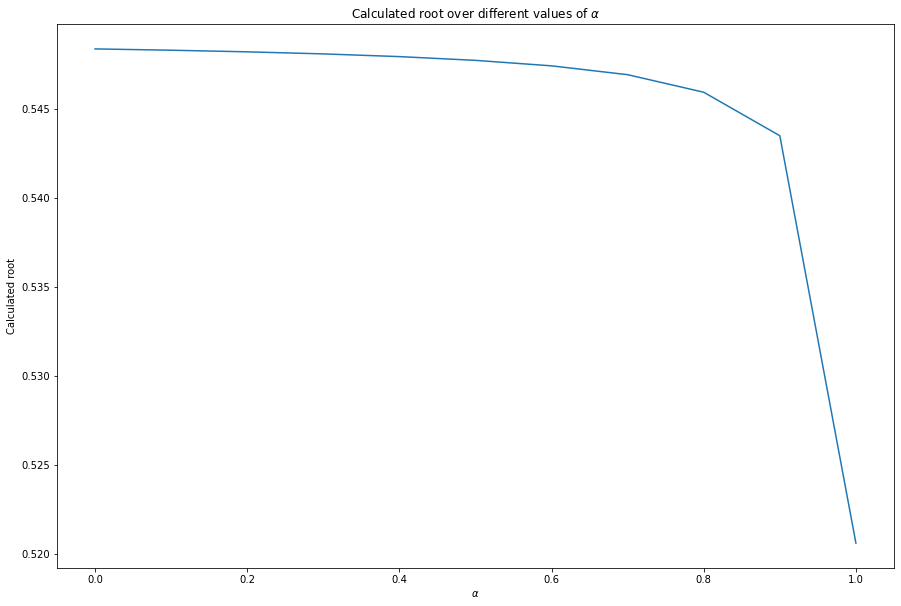

In [8]:
calc_roots = make_calculated_roots_over_alpha_plot(
    lambda_2=5,
    lambda_1_1=3,
    lambda_1_2=2,
    mu_1=3,
    mu_2=2,
    num_of_servers_1=3,
    num_of_servers_2=4,
    threshold_1=5,
    threshold_2=4,
    system_capacity_1=14,
    system_capacity_2=15,
    buffer_capacity_1=9,
    buffer_capacity_2=8,
)

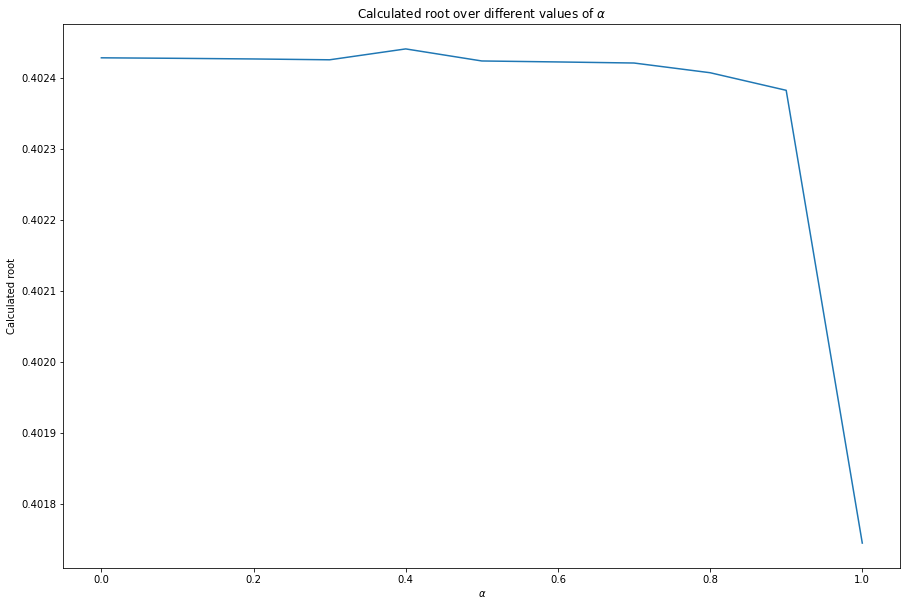

In [9]:
calc_roots = make_calculated_roots_over_alpha_plot(
    lambda_2=3,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=3,
    mu_2=2,
    num_of_servers_1=1,
    num_of_servers_2=2,
    threshold_1=10,
    threshold_2=9,
    system_capacity_1=10,
    system_capacity_2=9,
    buffer_capacity_1=6,
    buffer_capacity_2=7,
)

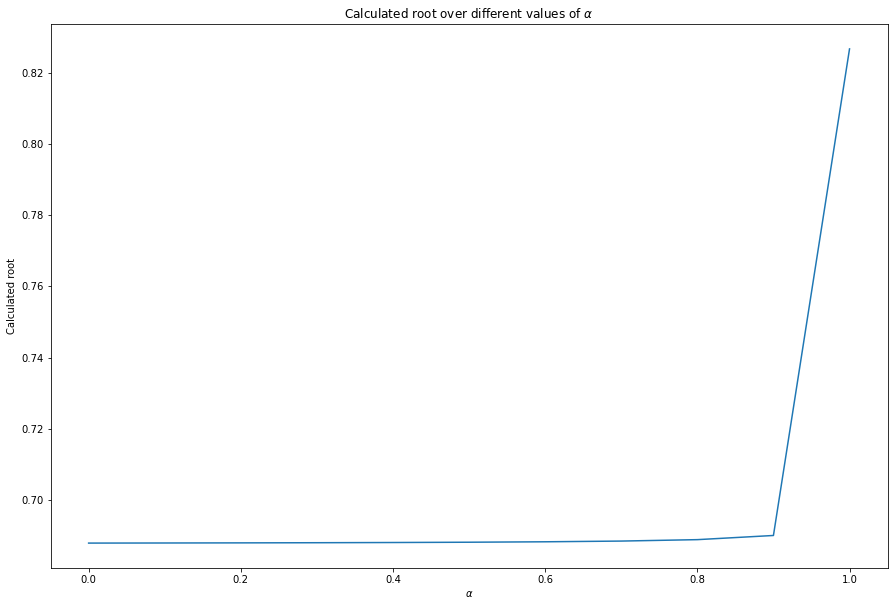

In [10]:
calc_roots = make_calculated_roots_over_alpha_plot(
    lambda_2=2,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=3,
    mu_2=2,
    num_of_servers_1=2,
    num_of_servers_2=3,
    threshold_1=5,
    threshold_2=4,
    system_capacity_1=6,
    system_capacity_2=10,
    buffer_capacity_1=10,
    buffer_capacity_2=4,
)

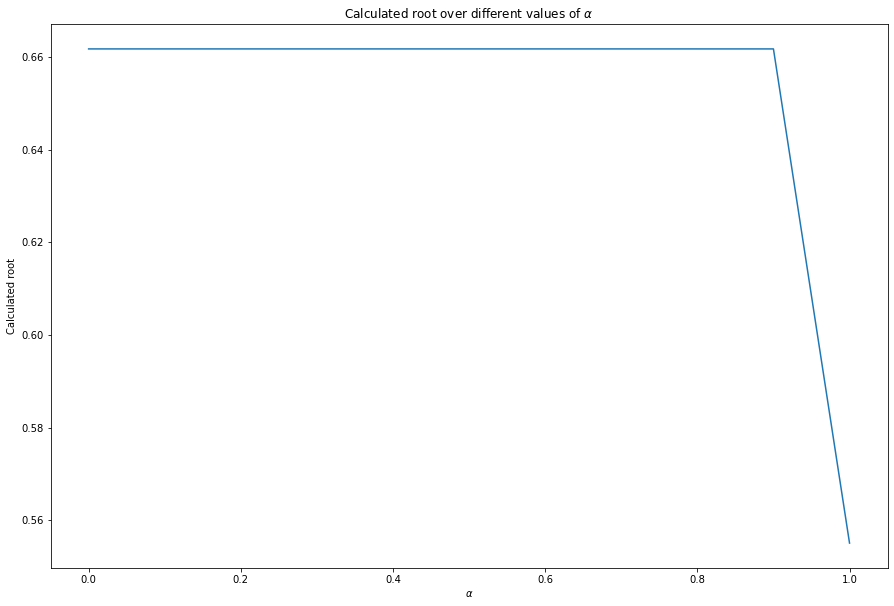

In [11]:
calc_roots = make_calculated_roots_over_alpha_plot(
    lambda_2=4,
    lambda_1_1=2,
    lambda_1_2=2,
    mu_1=3,
    mu_2=3,
    num_of_servers_1=3,
    num_of_servers_2=3,
    threshold_2=10,
    threshold_1=15,
    system_capacity_1=20,
    system_capacity_2=20,
    buffer_capacity_1=20,
    buffer_capacity_2=20,
)

# Routing Matrix by changing $\alpha$

In [4]:
lambda_2 = 4

lambda_1_1 = 3
mu_1 = 4
num_of_servers_1 = 2
system_capacity_1 = 8
buffer_capacity_1 = 8

lambda_1_2 = 3
mu_2 = 3
num_of_servers_2 = 3
system_capacity_2 = 8
buffer_capacity_2 = 8

target = 4

In [5]:
routing_matrix = get_routing_matrix(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    alpha=0,
)
routing_matrix

array([[0.67169891, 0.27056361, 0.03458479, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.94426422, 0.5911657 , 0.33717735, 0.25019181, 0.17625932,
        0.10297222, 0.        , 0.        ],
       [0.9800425 , 0.66523528, 0.44454481, 0.35834771, 0.28506572,
        0.21345171, 0.12257406, 0.        ],
       [1.        , 0.72648173, 0.52773794, 0.4421817 , 0.36946054,
        0.29917882, 0.21315358, 0.05805604],
       [1.        , 0.78243338, 0.59958143, 0.51431961, 0.44186157,
        0.3724688 , 0.2899716 , 0.14843712],
       [1.        , 0.84367419, 0.6721867 , 0.5859136 , 0.51268963,
        0.44321418, 0.36281014, 0.23093834],
       [1.        , 0.93570166, 0.76850605, 0.67662708, 0.59923226,
        0.5269215 , 0.44593688, 0.31961935],
       [1.        , 1.        , 0.96021407, 0.84475073, 0.750698  ,
        0.66628376, 0.57723946, 0.44903524]])

In [6]:
routing_matrix = get_routing_matrix(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    alpha=0.2,
)
routing_matrix

array([[0.66882031, 0.27265524, 0.03766007, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.94030286, 0.59038311, 0.33785086, 0.2512132 , 0.17745625,
        0.10417184, 0.        , 0.        ],
       [0.97584388, 0.66399388, 0.44459602, 0.35872662, 0.28560548,
        0.21402018, 0.12302383, 0.        ],
       [1.        , 0.72498449, 0.52745322, 0.44223395, 0.36968077,
        0.2994538 , 0.21337542, 0.05813032],
       [1.        , 0.78083924, 0.59911476, 0.5141908 , 0.44190424,
        0.372584  , 0.29007765, 0.14847144],
       [1.        , 0.84215316, 0.67166588, 0.5857062 , 0.51264092,
        0.44324103, 0.36285216, 0.23095334],
       [1.        , 0.93446718, 0.76806834, 0.67643854, 0.59916312,
        0.52691107, 0.44594665, 0.31962428],
       [1.        , 1.        , 0.96002261, 0.84467673, 0.75066899,
        0.66627507, 0.57723929, 0.44903596]])

In [7]:
routing_matrix = get_routing_matrix(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    alpha=0.4,
)
routing_matrix

array([[0.66443225, 0.27596368, 0.04254372, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.9341038 , 0.58911935, 0.33894926, 0.25287608, 0.17940116,
        0.10612091, 0.        , 0.        ],
       [0.9692892 , 0.66198965, 0.44467989, 0.35934809, 0.28649088,
        0.21495336, 0.12376452, 0.        ],
       [1.        , 0.7225708 , 0.5269867 , 0.44231988, 0.37004357,
        0.2999075 , 0.21374252, 0.05825383],
       [1.        , 0.77827159, 0.59835015, 0.51397866, 0.44197469,
        0.37277459, 0.29025357, 0.14852856],
       [1.        , 0.83970037, 0.67081172, 0.58536412, 0.51256033,
        0.44328553, 0.36292197, 0.23097832],
       [1.        , 0.93246593, 0.76734806, 0.6761266 , 0.59904843,
        0.52689375, 0.4459629 , 0.31963248],
       [1.        , 1.        , 0.95970521, 0.84455369, 0.7506207 ,
        0.66626059, 0.57723902, 0.44903717]])

In [8]:
routing_matrix = get_routing_matrix(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    alpha=0.6,
)
routing_matrix

array([[0.65694055, 0.28199297, 0.05152236, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.92297559, 0.58673316, 0.34106034, 0.2560634 , 0.18311719,
        0.10984451, 0.01103133, 0.        ],
       [0.95756625, 0.65820476, 0.44484224, 0.36055482, 0.28821073,
        0.21676859, 0.12521362, 0.        ],
       [0.98960863, 0.71802248, 0.52608251, 0.44248756, 0.3707537 ,
        0.3007981 , 0.21446701, 0.05849979],
       [1.        , 0.77343927, 0.5968681 , 0.51356371, 0.44211316,
        0.3731506 , 0.29060237, 0.14864254],
       [1.        , 0.83507446, 0.66915307, 0.58469301, 0.51240137,
        0.44337364, 0.36306079, 0.23102822],
       [1.        , 0.9286573 , 0.76594076, 0.67551121, 0.59882107,
        0.52685931, 0.4459953 , 0.31964888],
       [1.        , 1.        , 0.95907668, 0.84430873, 0.75052435,
        0.66623167, 0.57723846, 0.44903958]])

In [9]:
routing_matrix = get_routing_matrix(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    alpha=0.8,
)
routing_matrix

array([[0.64136673, 0.29650468, 0.07377801, 0.02003542, 0.        ,
        0.        , 0.        , 0.        ],
       [0.89666301, 0.58052846, 0.34678902, 0.26467395, 0.1930948 ,
        0.11984428, 0.01940755, 0.        ],
       [0.93002696, 0.64833245, 0.44529023, 0.36391102, 0.29300274,
        0.22184667, 0.12932483, 0.        ],
       [0.96161618, 0.70618984, 0.52357933, 0.44295947, 0.37276834,
        0.3033441 , 0.21656682, 0.05922927],
       [1.        , 0.76088576, 0.59276094, 0.5123885 , 0.44251009,
        0.37423891, 0.29162513, 0.14898239],
       [1.        , 0.8229952 , 0.66453332, 0.58277767, 0.51194146,
        0.44363111, 0.36347085, 0.23117739],
       [1.        , 0.91851442, 0.76196149, 0.67372938, 0.59815464,
        0.52675758, 0.44609166, 0.31969798],
       [1.        , 1.        , 0.95723915, 0.84358267, 0.75023709,
        0.66614522, 0.57723681, 0.44904682]])

In [10]:
routing_matrix = get_routing_matrix(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    alpha=1,
)
routing_matrix

array([[0.59205816, 0.3806394 , 0.2960679 , 0.27798555, 0.25829061,
        0.23351591, 0.1956926 , 0.12676813],
       [0.72785318, 0.5237554 , 0.42553394, 0.39819687, 0.36851981,
        0.3319736 , 0.27809655, 0.18203282],
       [0.74029159, 0.54642659, 0.45226794, 0.4246363 , 0.39446984,
        0.35721406, 0.30220042, 0.20289788],
       [0.75303795, 0.56988962, 0.48034955, 0.45262257, 0.42217606,
        0.38446739, 0.32872454, 0.22700074],
       [0.76769472, 0.59647266, 0.51224522, 0.48456345, 0.4539733 ,
        0.41597776, 0.35979727, 0.25634582],
       [0.7876055 , 0.63098526, 0.55315851, 0.52557339, 0.49485081,
        0.45656995, 0.40002855, 0.29525863],
       [0.82058511, 0.68482559, 0.61562058, 0.58806648, 0.55699796,
        0.51809975, 0.46081569, 0.35447681],
       [0.88411401, 0.7868441 , 0.73316039, 0.70630672, 0.67499865,
        0.6350767 , 0.57621806, 0.46713452]])

# Differences in game by decreasing target

In [59]:
game_1 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=2,
    alpha=0.2,
)
list(game_1.support_enumeration())

[(array([0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 1.]))]

In [3]:
game_2 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=1.1,
    alpha=0.2,
)
list(game_2.support_enumeration())

[(array([0., 0., 0., 0., 0., 0., 1., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0.])),
 (array([0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 1., 0.])),
 (array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.2539784, 0.7460216]),
  array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.41580486, 0.58419514, 0.        ]))]

In [10]:
game_2

Bi matrix game with payoff matrices:

Row player:
[[-9.80816671e-04 -9.80816671e-04 -9.80816671e-04 -9.80816671e-04
  -9.80816671e-04 -9.80816671e-04 -9.80816671e-04 -9.80816671e-04]
 [-7.36791464e-04 -8.01860306e-04 -8.67280768e-04 -8.93305587e-04
  -9.17030184e-04 -9.42154434e-04 -9.80816671e-04 -9.80816671e-04]
 [-1.94591487e-04 -3.81708828e-04 -5.64064902e-04 -6.42403243e-04
  -7.10871299e-04 -7.78756494e-04 -8.65335298e-04 -9.80816671e-04]
 [-2.74877040e-05 -4.93985353e-05 -2.40188312e-04 -3.52723175e-04
  -4.56234433e-04 -5.59767065e-04 -6.87129621e-04 -9.05762113e-04]
 [-8.48048702e-04 -9.65812567e-05 -1.98016939e-05 -1.02833291e-04
  -2.08800983e-04 -3.28669090e-04 -4.82126635e-04 -7.42858819e-04]
 [-2.96623167e-03 -9.75292058e-04 -9.39943059e-05 -5.67523969e-07
  -3.39083331e-05 -1.26514591e-04 -2.75887571e-04 -5.54234299e-04]
 [-4.99026527e-03 -3.28767063e-03 -7.78659216e-04 -2.16203890e-04
  -2.71681640e-05 -5.77240185e-06 -9.25711010e-05 -3.41453919e-04]
 [-3.83826139e-03 -

[array([0.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 1.7000e+01,
        1.0060e+03, 9.8972e+04, 0.0000e+00]),
 array([1.0000e+00, 0.0000e+00, 0.0000e+00, 2.2000e+01, 5.6500e+03,
        9.4327e+04, 0.0000e+00, 0.0000e+00])]

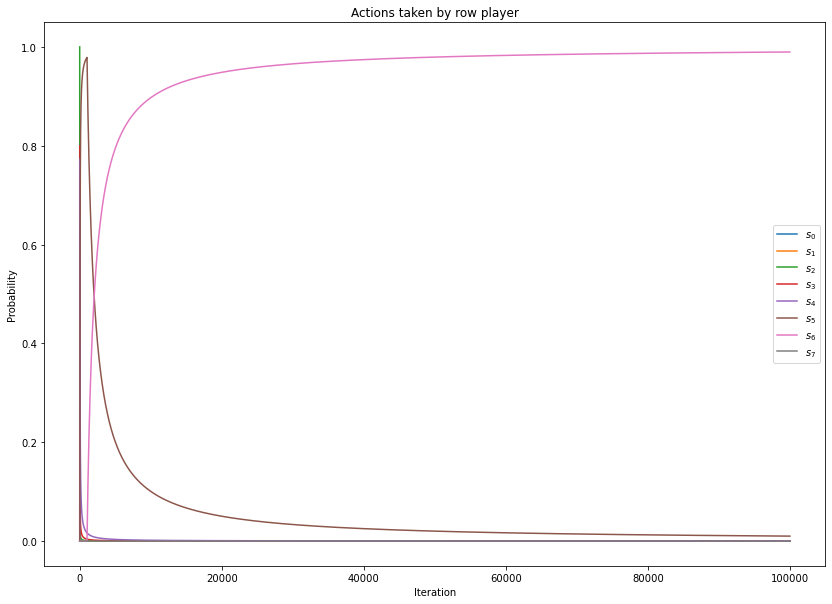

In [35]:
make_fictitious_play_plot(game=game_2, seed=3, iterations=100000)

[array([    0.,     0.,     0.,     0.,     0.,     0.,     0., 10000.]),
 array([    0.,     0.,     0.,     0.,     0.,     0., 10000.,     0.])]

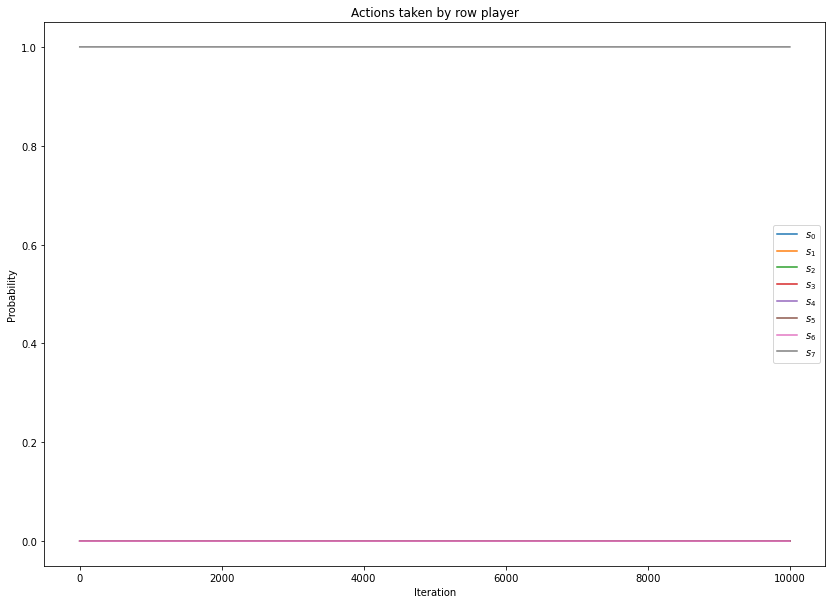

In [34]:
plays = (np.array([0, 0, 0, 0, 0, 0, 0, 1]), np.array([0, 0, 0, 0, 0, 0, 1, 0]))
make_fictitious_play_plot(game=game_2, seed=None, iterations=9999, play_counts_start=plays)

In [143]:
game_3 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=1.05,
    alpha=0.2,
)
list(game_3.support_enumeration())

[(array([0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0.]))]

In [144]:
game_4 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=1,
    alpha=0.2,
)
list(game_4.support_enumeration())

[(array([0., 0., 1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

In [145]:
game_5 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=0.9,
    alpha=0.2,
)
list(game_5.support_enumeration())

[(array([0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

In [146]:
game_6 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=0.8,
    alpha=0.2,
)
list(game_6.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

### Using alternative method

In [147]:
game_alt = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=2,
    alpha=0.2,
    alternative_utility=True,
)
list(game_alt.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

# Differences in N.E. by changing $\alpha$ (Example 1)

In [148]:
game_1 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=1,
    alpha=0.2,
)
list(game_1.support_enumeration())

[(array([0., 0., 1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

In [171]:
game_2 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=1,
    alpha=0.4,
)
list(game_2.support_enumeration())

[(array([0., 0., 1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

In [172]:
game_3 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=1,
    alpha=0.6,
)
list(game_3.support_enumeration())

[(array([0., 0., 1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

In [156]:
game_4 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=1,
    alpha=0.8,
)
list(game_4.support_enumeration())

[(array([0., 0., 1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

# Differences in N.E. by changing $\alpha$ using alternative method ($\max \, P(W<t)$)

In [158]:
game_3 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=1,
    alpha=0.2,
    alternative_utility=True,
)
list(game_3.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

In [160]:
game_4 = build_game_using_payoff_matrices(
    lambda_2=4,
    lambda_1_1=3,
    lambda_1_2=3,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=8,
    system_capacity_2=8,
    buffer_capacity_1=8,
    buffer_capacity_2=8,
    target=1,
    alpha=0.8,
    alternative_utility=True,
)
list(game_4.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

# Differences in N.E. by changing $\alpha$ (Example 2)

In [173]:
game_1 = build_game_using_payoff_matrices(
    lambda_2=2,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=1,
    mu_2=1.5,
    num_of_servers_1=3,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=9,
    buffer_capacity_2=7,
    target=3,
    alpha=0,
)
list(game_1.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0.]))]

In [174]:
game_2 = build_game_using_payoff_matrices(
    lambda_2=2,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=1,
    mu_2=1.5,
    num_of_servers_1=3,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=9,
    buffer_capacity_2=7,
    target=3,
    alpha=0.2,
)
list(game_2.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0.]))]

In [175]:
game_3 = build_game_using_payoff_matrices(
    lambda_2=2,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=1,
    mu_2=1.5,
    num_of_servers_1=3,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=9,
    buffer_capacity_2=7,
    target=3,
    alpha=0.4,
)
list(game_3.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0.]))]

In [176]:
game_4 = build_game_using_payoff_matrices(
    lambda_2=2,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=1,
    mu_2=1.5,
    num_of_servers_1=3,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=9,
    buffer_capacity_2=7,
    target=3,
    alpha=0.6,
)
list(game_4.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0.]))]

In [177]:
game_5 = build_game_using_payoff_matrices(
    lambda_2=2,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=1,
    mu_2=1.5,
    num_of_servers_1=3,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=9,
    buffer_capacity_2=7,
    target=3,
    alpha=0.8,
)
list(game_5.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0.]))]

In [178]:
game_6 = build_game_using_payoff_matrices(
    lambda_2=2,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=1,
    mu_2=1.5,
    num_of_servers_1=3,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=9,
    buffer_capacity_2=7,
    target=3,
    alpha=1,
)
list(game_6.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0.]))]

# Fictittious play plot for different values of $\alpha$

(array([[0.523, 0.474, 0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.001,
         0.   ],
        [0.523, 0.475, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.001,
         0.   ],
        [0.523, 0.475, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.001,
         0.   ],
        [0.522, 0.475, 0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.001,
         0.   ],
        [0.998, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.001,
         0.   ],
        [0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
         0.   ]]),
 array([[0.   , 0.   , 0.   , 0.99 , 0.   , 0.   , 0.009, 0.   , 0.   ,
         0.001],
        [0.   , 0.   , 0.   , 0.995, 0.   , 0.   , 0.003, 0.001, 0.   ,
         0.001],
        [0.   , 0.   , 0.   , 0.995, 0.   , 0.   , 0.004, 0.   , 0.   ,
         0.001],
        [0.   , 0.   , 0.   , 0.989, 0.   , 0.   , 0.01 , 0.   , 0.   ,
         0.001],
        [0.   , 0.   , 0.002, 0.996, 0.   , 0.   , 0.   , 0.001, 0.   ,
         0.001],
        [0.503, 0. 

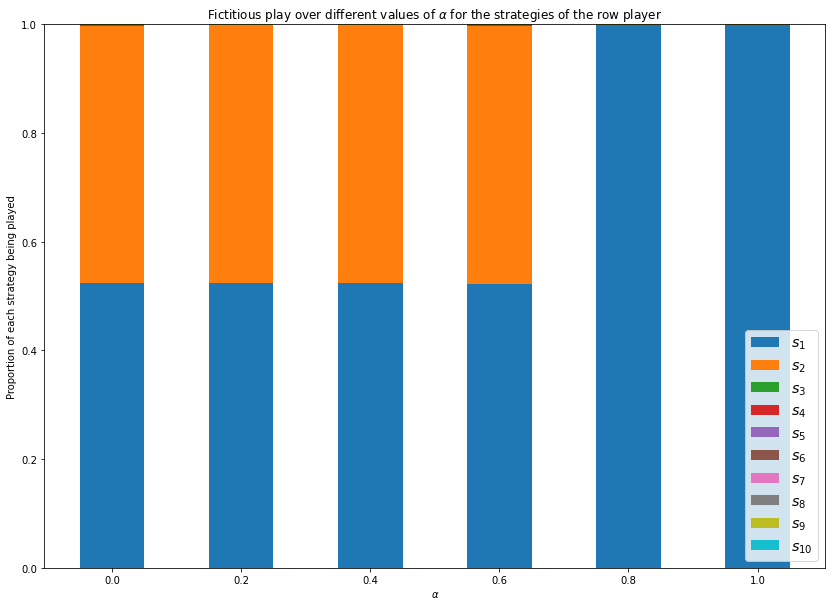

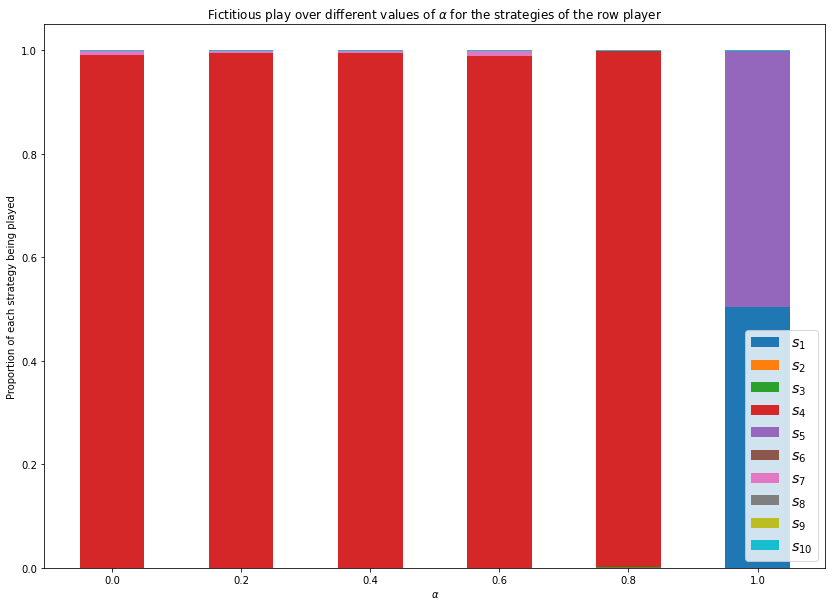

In [71]:
make_ficititious_play_plot_over_different_values_of_alpha(
    lambda_2=2,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=2,
    mu_2=2,
    num_of_servers_1=7,
    num_of_servers_2=10,
    system_capacity_1=10,
    system_capacity_2=10,
    buffer_capacity_1=5,
    buffer_capacity_2=5,
    target=1,
    iterations=1000,
    seed=3,
)

(array([[0.   , 0.001, 0.023, 0.976, 0.   , 0.   , 0.   ],
        [0.   , 0.001, 0.024, 0.975, 0.   , 0.   , 0.   ],
        [0.   , 0.001, 0.026, 0.973, 0.   , 0.   , 0.   ],
        [0.   , 0.001, 0.025, 0.974, 0.   , 0.   , 0.   ],
        [0.   , 0.001, 0.024, 0.975, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.013, 0.987, 0.   , 0.   , 0.   ]]),
 array([[0.001, 0.   , 0.   , 0.047, 0.952, 0.   , 0.   , 0.   ],
        [0.001, 0.   , 0.   , 0.046, 0.953, 0.   , 0.   , 0.   ],
        [0.001, 0.   , 0.   , 0.045, 0.954, 0.   , 0.   , 0.   ],
        [0.001, 0.   , 0.   , 0.037, 0.962, 0.   , 0.   , 0.   ],
        [0.001, 0.   , 0.   , 0.025, 0.974, 0.   , 0.   , 0.   ],
        [0.001, 0.   , 0.   , 0.   , 0.223, 0.776, 0.   , 0.   ]]))

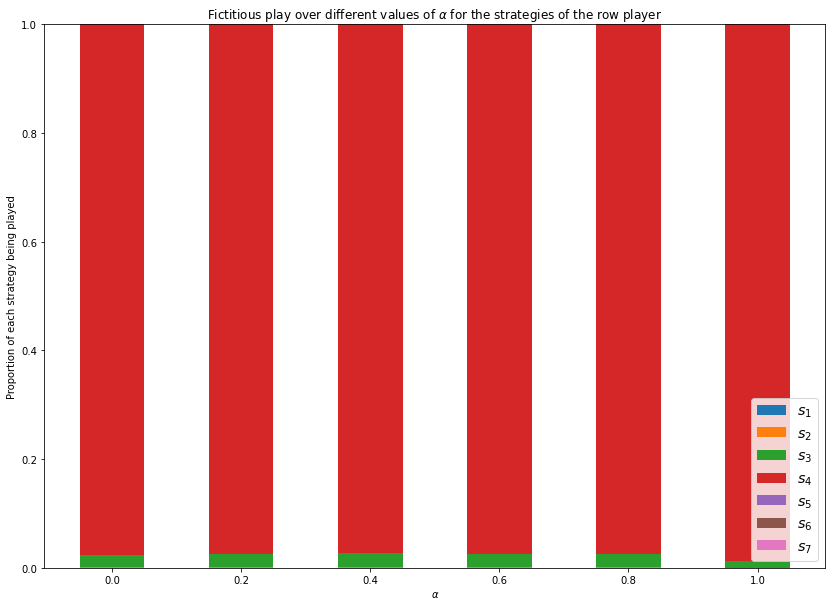

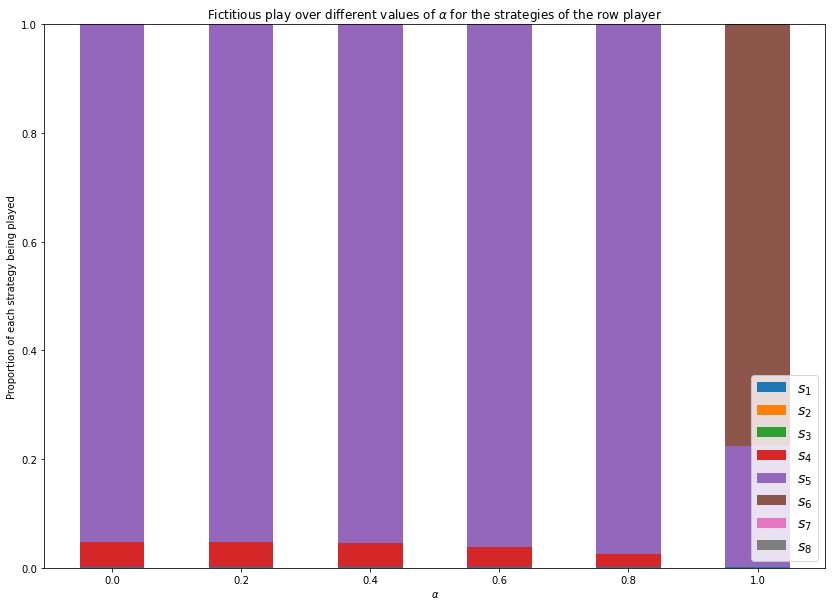

In [72]:
make_ficititious_play_plot_over_different_values_of_alpha(
    lambda_2=3,
    lambda_1_1=2,
    lambda_1_2=3,
    mu_1=6,
    mu_2=4,
    num_of_servers_1=1,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=5,
    buffer_capacity_2=4,
    target=1,
    seed=3,
    iterations=1000,
)

(array([[0.   , 0.   , 0.   , 0.001, 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.999]]),
 array([[0.   , 0.   , 0.001, 0.   , 0.999],
        [0.   , 0.   , 0.001, 0.   , 0.999],
        [0.   , 0.   , 0.001, 0.   , 0.999],
        [0.   , 0.   , 0.001, 0.   , 0.999],
        [0.   , 0.   , 0.001, 0.   , 0.999],
        [0.   , 0.   , 0.001, 0.   , 0.999]]))

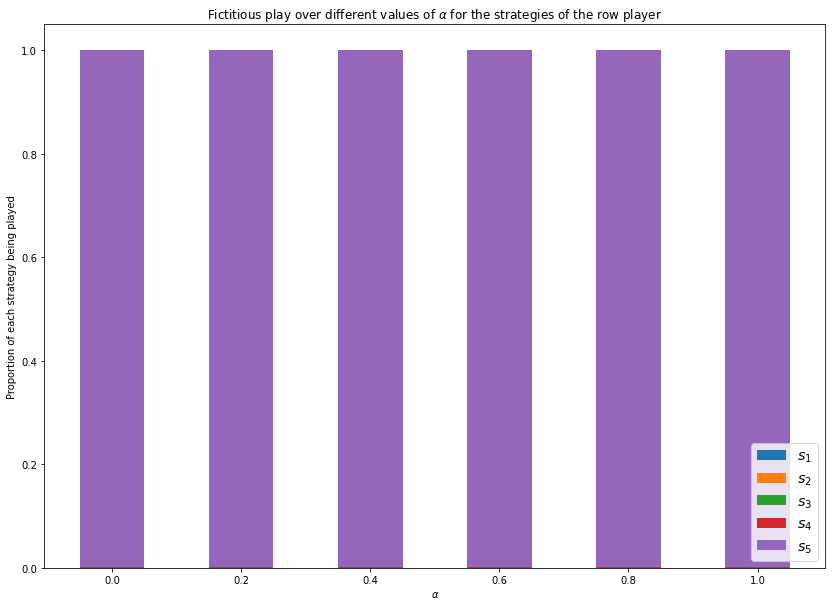

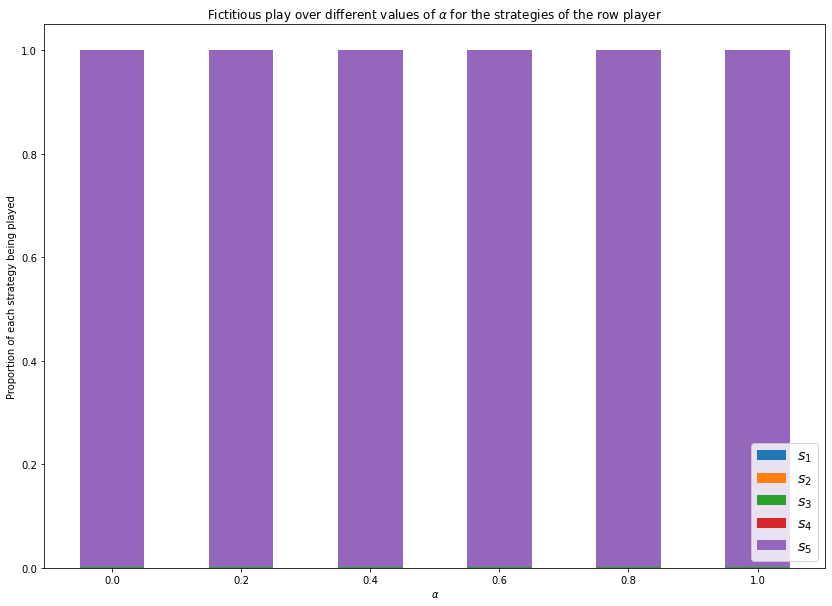

In [73]:
make_ficititious_play_plot_over_different_values_of_alpha(
    lambda_2=1,
    lambda_1_1=0.5,
    lambda_1_2=0.5,
    mu_1=5,
    mu_2=5,
    num_of_servers_1=1,
    num_of_servers_2=2,
    system_capacity_1=5,
    system_capacity_2=5,
    buffer_capacity_1=5,
    buffer_capacity_2=4,
    target=1,
    iterations=1000,
)

(array([[0.999, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ]]),
 array([[0.998, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ]]))

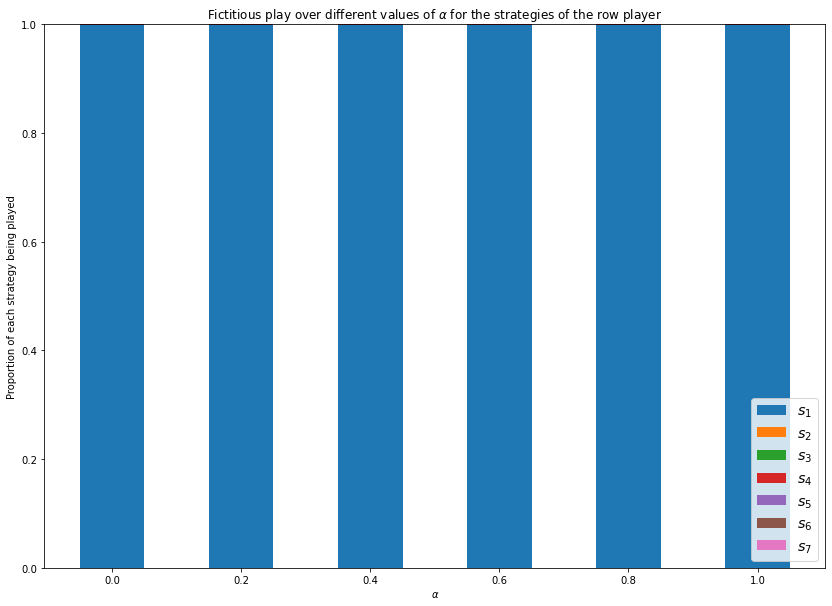

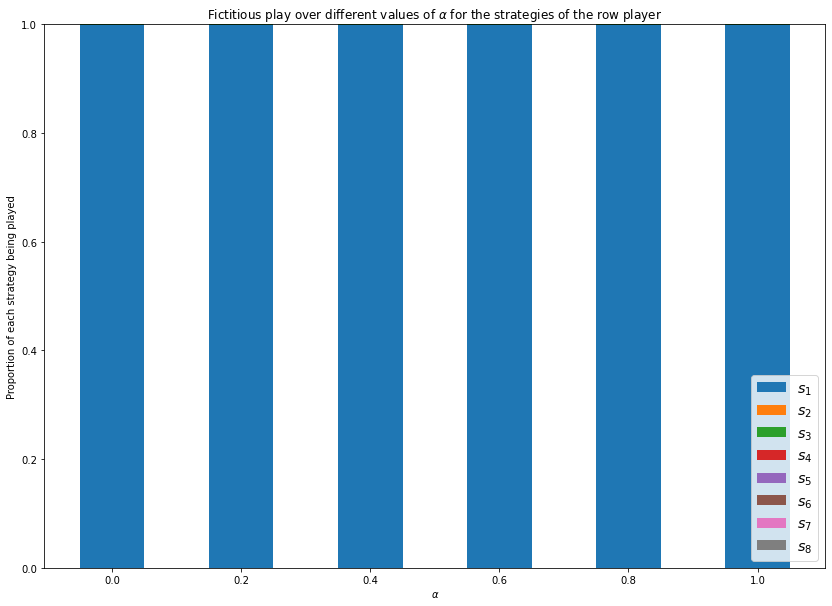

In [74]:
make_ficititious_play_plot_over_different_values_of_alpha(
    lambda_2=3,
    lambda_1_1=2,
    lambda_1_2=3,
    mu_1=4,
    mu_2=2,
    num_of_servers_1=1,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=5,
    buffer_capacity_2=4,
    target=0.6,
    iterations=1000,
)

(array([[0.   , 0.   , 0.   , 0.999, 0.   , 0.001, 0.   ],
        [0.   , 0.   , 0.   , 0.999, 0.   , 0.001, 0.   ],
        [0.   , 0.   , 0.   , 0.999, 0.   , 0.001, 0.   ],
        [0.   , 0.   , 0.   , 0.999, 0.   , 0.001, 0.   ],
        [0.   , 0.   , 0.   , 0.999, 0.   , 0.001, 0.   ],
        [0.   , 0.   , 0.001, 0.998, 0.   , 0.001, 0.   ]]),
 array([[0.   , 0.   , 0.   , 0.001, 0.998, 0.001, 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.998, 0.001, 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.998, 0.001, 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.998, 0.001, 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.998, 0.001, 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.   , 0.998, 0.001, 0.   ]]))

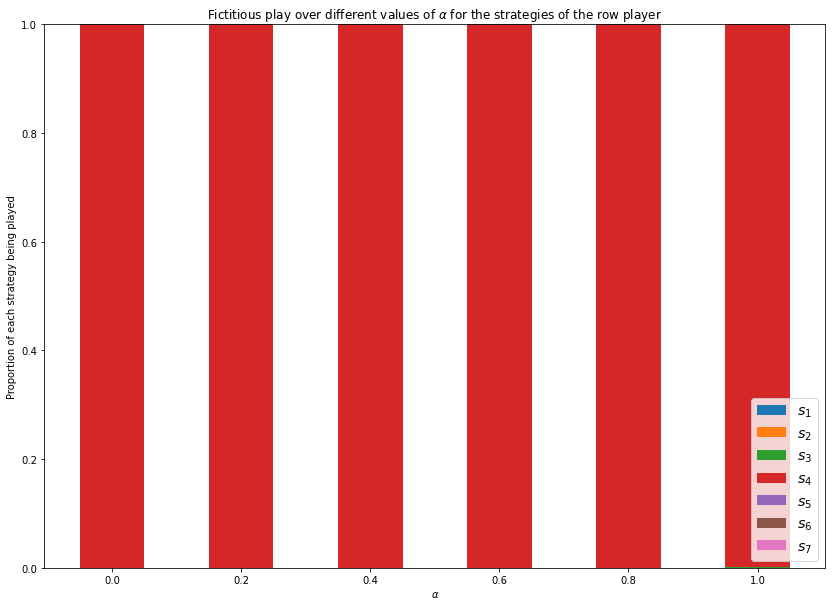

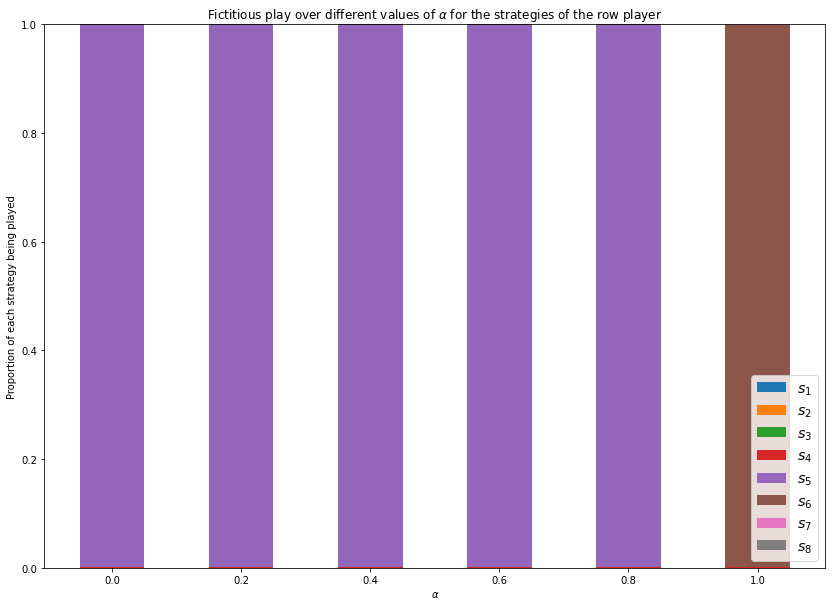

In [75]:
make_ficititious_play_plot_over_different_values_of_alpha(
    lambda_2=3,
    lambda_1_1=2,
    lambda_1_2=3,
    mu_1=6,
    mu_2=4,
    num_of_servers_1=1,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=5,
    buffer_capacity_2=4,
    target=1,
    iterations=1000,
    seed=1,
)

(array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999],
        [0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999]]),
 array([[0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.999],
        [0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.999],
        [0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.999],
        [0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.999],
        [0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.999],
        [0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.999]]))

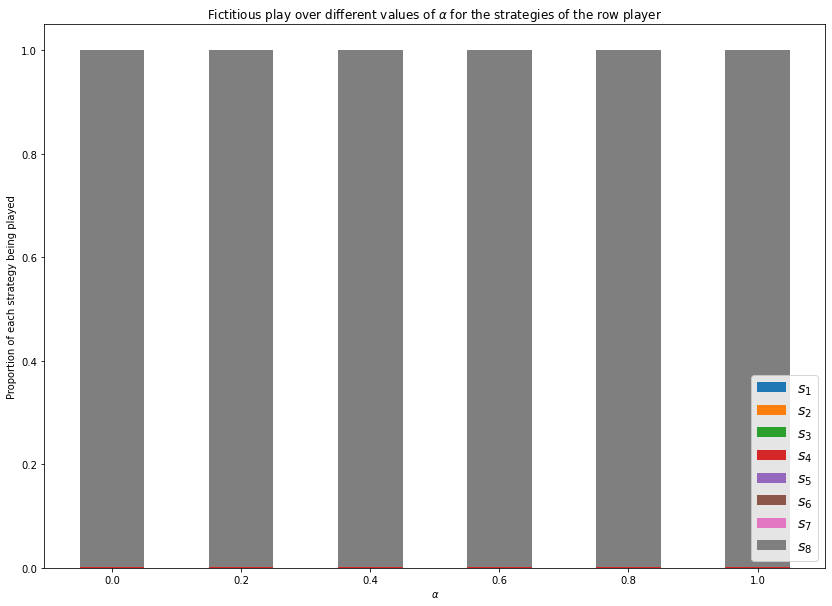

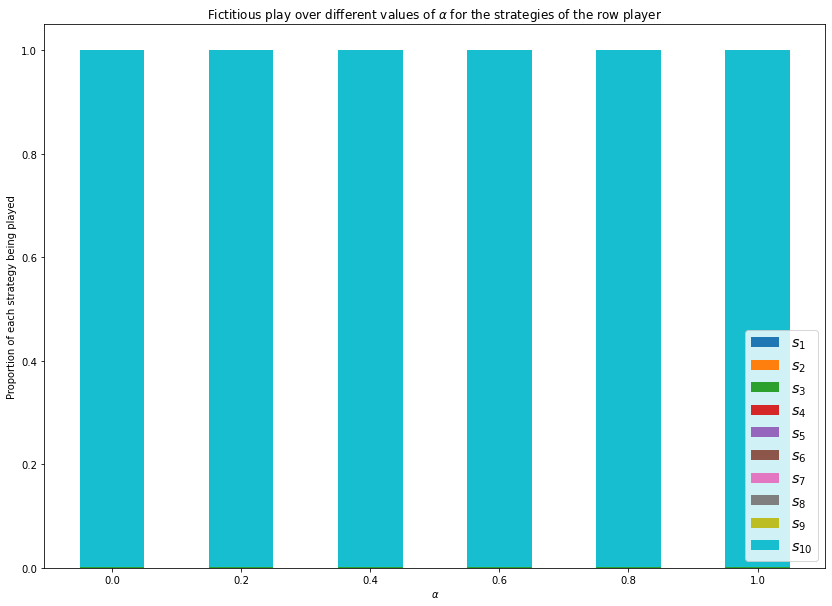

In [76]:
make_ficititious_play_plot_over_different_values_of_alpha(
    lambda_2=3,
    lambda_1_1=2,
    lambda_1_2=3,
    mu_1=4,
    mu_2=2,
    num_of_servers_1=2,
    num_of_servers_2=5,
    system_capacity_1=8,
    system_capacity_2=10,
    buffer_capacity_1=7,
    buffer_capacity_2=5,
    target=3,
    iterations=1000,
)

(array([[0.   , 0.   , 0.   , 0.001, 0.999, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.999, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.999, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.999, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.999, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.997, 0.001, 0.001, 0.   ]]),
 array([[0.496, 0.503, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   ],
        [0.496, 0.503, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   ],
        [0.496, 0.503, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   ],
        [0.496, 0.503, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   ],
        [0.496, 0.503, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   ],
        [0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   ]]))

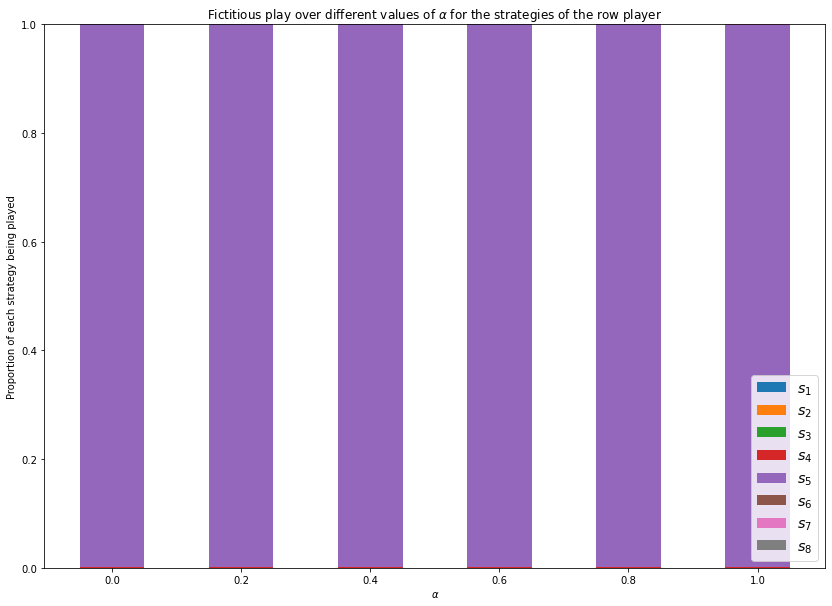

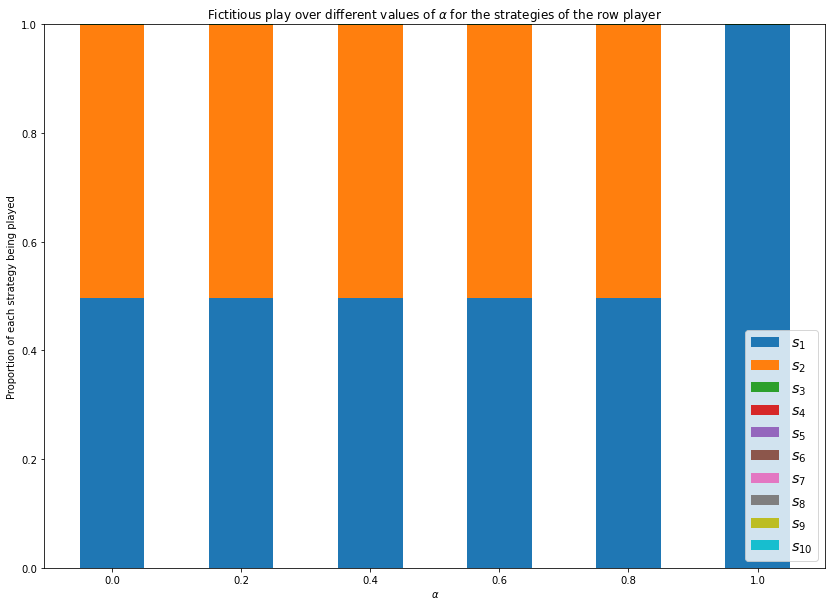

In [77]:
make_ficititious_play_plot_over_different_values_of_alpha(
    lambda_2=3,
    lambda_1_1=2,
    lambda_1_2=3,
    mu_1=4,
    mu_2=2,
    num_of_servers_1=2,
    num_of_servers_2=5,
    system_capacity_1=8,
    system_capacity_2=10,
    buffer_capacity_1=7,
    buffer_capacity_2=5,
    target=1,
    iterations=1000,
)

# Violinplots of fictitious play

In [702]:
def make_violinplots_of_fictitious_play(
    lambda_2,
    lambda_1_1,
    lambda_1_2,
    mu_1,
    mu_2,
    num_of_servers_1,
    num_of_servers_2,
    system_capacity_1,
    system_capacity_2,
    buffer_capacity_1,
    buffer_capacity_2,
    target,
    alpha=0.5,
    iterations=100,
    seed_start=0,
    seed_reps=30,
    num_of_violiplots=8,
    violin_width=10,
):

    seed_range = np.linspace(
        seed_start, seed_start + 10000, seed_reps, dtype=int
    )
    violinplots_data_pos = np.linspace(1, iterations, num_of_violiplots, dtype=int)

    game = build_game_using_payoff_matrices(
        lambda_2=lambda_2,
        lambda_1_1=lambda_1_1,
        lambda_1_2=lambda_1_2,
        mu_1=mu_1,
        mu_2=mu_2,
        num_of_servers_1=num_of_servers_1,
        num_of_servers_2=num_of_servers_2,
        system_capacity_1=system_capacity_1,
        system_capacity_2=system_capacity_2,
        buffer_capacity_1=buffer_capacity_1,
        buffer_capacity_2=buffer_capacity_2,
        target=target,
        alpha=alpha,
    )

    all_violinplots_data_row = None
    for seed in seed_range:
        np.random.seed(seed)
        play_counts = tuple(game.fictitious_play(iterations=iterations))
        current_violinplot_data_row_player = None
        for pos in violinplots_data_pos:
            row_plays, col_plays = play_counts[pos]
            if current_violinplot_data_row_player is None:
                current_violinplot_data_row_player = np.array(
                    [row_plays]
                )
            else:
                current_violinplot_data_row_player = np.concatenate(
                    (
                        current_violinplot_data_row_player, 
                        np.array([row_plays])
                    )
                )

        if all_violinplots_data_row is None:
            all_violinplots_data_row = [current_violinplot_data_row_player]
        else:
            all_violinplots_data_row = np.concatenate(
                (
                    all_violinplots_data_row, 
                    [current_violinplot_data_row_player],
                )
            )
    row_player_strategies = all_violinplots_data_row.shape[2]
    plt.figure(figsize=(20,10))
    row_labels = []
    for row_strategy in range(row_player_strategies):
        violin = plt.violinplot(
            all_violinplots_data_row[:, :, row_strategy],
            violinplots_data_pos,
            widths=violin_width,
        )
        color = violin["bodies"][0].get_facecolor().flatten()
        row_labels.append((mpatches.Patch(color=color), f"$s_{{{row_strategy + 1}}}$"))

    plt.xlabel("Iteration")
    plt.ylabel("Times played")
    plt.legend(*zip(*row_labels), fontsize="x-large")
    return all_violinplots_data_row


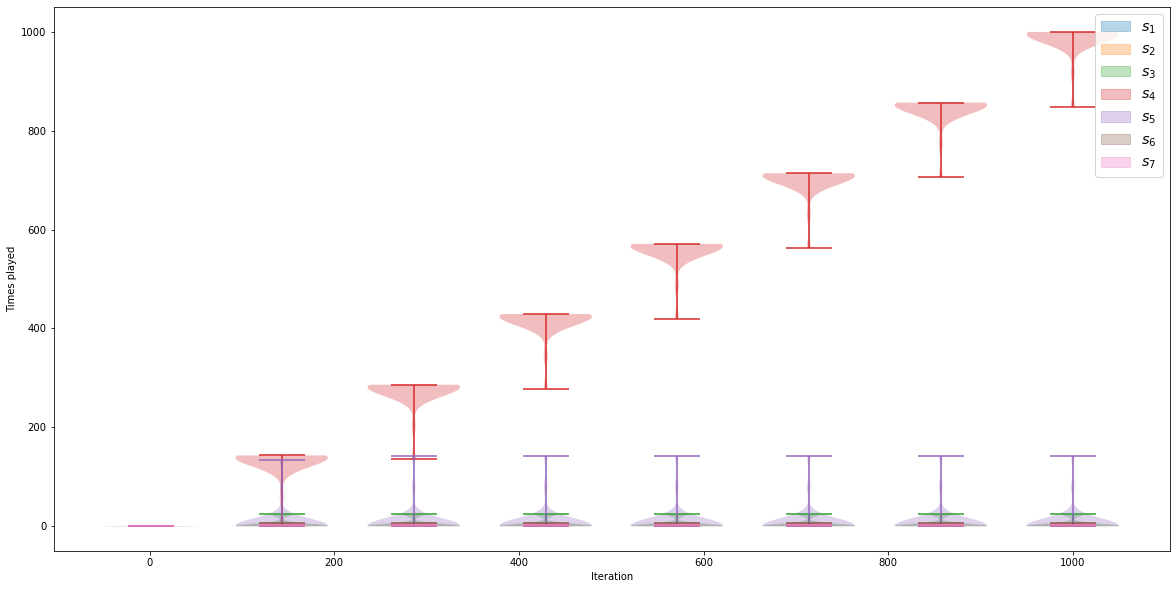

In [705]:
demo = make_violinplots_of_fictitious_play(
    lambda_2=3,
    lambda_1_1=2,
    lambda_1_2=3,
    mu_1=6,
    mu_2=4,
    num_of_servers_1=1,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=5,
    buffer_capacity_2=4,
    target=1,
    iterations=1000,
    violin_width=100,
)

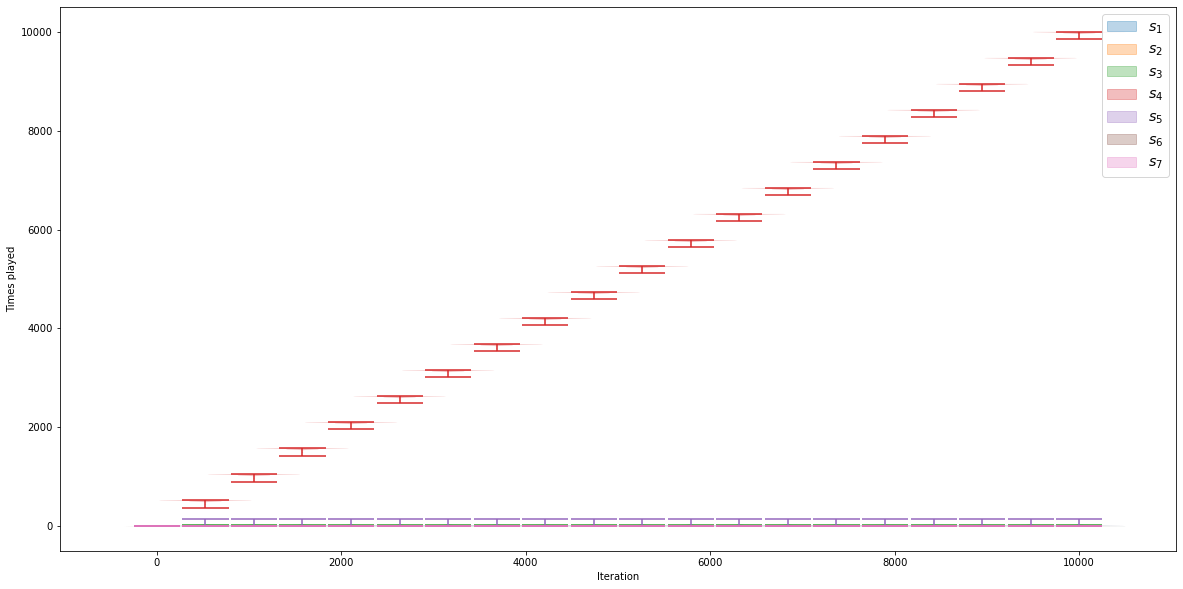

In [706]:
demo = make_violinplots_of_fictitious_play(
    lambda_2=3,
    lambda_1_1=2,
    lambda_1_2=3,
    mu_1=6,
    mu_2=4,
    num_of_servers_1=1,
    num_of_servers_2=2,
    system_capacity_1=7,
    system_capacity_2=8,
    buffer_capacity_1=5,
    buffer_capacity_2=4,
    target=1,
    iterations=10000,
    seed_reps=100,
    num_of_violiplots=20,
    violin_width=1000,
)